# Beginer notebook
- Using League of Legends ranked data from kaggle to analyze the finals btw SSG and SKT
https://www.kaggle.com/paololol/league-of-legends-ranked-matches

In [2]:
#import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#loading data
champs = pd.read_csv(r'D:\Documents\ML\LOL\champs.csv')
champs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 2 columns):
name    138 non-null object
id      138 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [4]:
matches = pd.read_csv(r'D:\Documents\ML\LOL\matches.csv')
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184069 entries, 0 to 184068
Data columns (total 8 columns):
id            184069 non-null int64
gameid        184069 non-null int64
platformid    184069 non-null object
queueid       184069 non-null int64
seasonid      184069 non-null int64
duration      184069 non-null int64
creation      184069 non-null int64
version       184069 non-null object
dtypes: int64(6), object(2)
memory usage: 11.2+ MB


In [5]:
participants = pd.read_csv(r'D:\Documents\ML\LOL\participants.csv')
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834520 entries, 0 to 1834519
Data columns (total 8 columns):
id            int64
matchid       int64
player        int64
championid    int64
ss1           int64
ss2           int64
role          object
position      object
dtypes: int64(6), object(2)
memory usage: 112.0+ MB


In [6]:
stats1 = pd.read_csv(r'D:\Documents\ML\LOL\stats1.csv')
stats2 = pd.read_csv(r'D:\Documents\ML\LOL\stats2.csv')
stats = stats1.append(stats2)
stats.info()

C:\Users\ASUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1834517 entries, 0 to 834517
Data columns (total 56 columns):
id                        int64
win                       int64
item1                     int64
item2                     int64
item3                     int64
item4                     int64
item5                     int64
item6                     int64
trinket                   int64
kills                     int64
deaths                    int64
assists                   int64
largestkillingspree       int64
largestmultikill          int64
killingsprees             int64
longesttimespentliving    int64
doublekills               int64
triplekills               int64
quadrakills               int64
pentakills                int64
legendarykills            int64
totdmgdealt               int64
magicdmgdealt             int64
physicaldmgdealt          int64
truedmgdealt              int64
largestcrit               int64
totdmgtochamp             int64
magicdmgtochamp         

In [7]:
#filtering 
col_list = ['id','win','kills','deaths','assists','totdmgtochamp','magicdmgtochamp','physdmgtochamp','totheal','dmgselfmit','totcctimedealt',
           'totdmgtaken','goldearned','turretkills','inhibkills','totminionskilled','champlvl','wardsplaced','firstblood']
stats = stats[col_list]
stats.head()

,id,win,kills,deaths,assists,totdmgtochamp,magicdmgtochamp,physdmgtochamp,totheal,dmgselfmit,totcctimedealt,totdmgtaken,goldearned,turretkills,inhibkills,totminionskilled,champlvl,wardsplaced,firstblood
0,9,0,6,10,1,9101,3975,4237,15160,23998,610,41446,10497,0,0,42,13,10,0
1,10,0,0,2,12,8478,6684,977,11707,9402,211,17769,9496,1,0,17,14,17,0
2,11,0,7,8,5,14425,331,14070,2283,16612,182,25627,13136,0,0,205,14,13,0
3,12,0,5,11,2,15267,296,11802,4252,27174,106,31705,11006,3,0,164,15,3,0
4,13,0,2,8,2,18229,17925,28,1525,14616,159,20585,11439,1,0,235,15,10,0


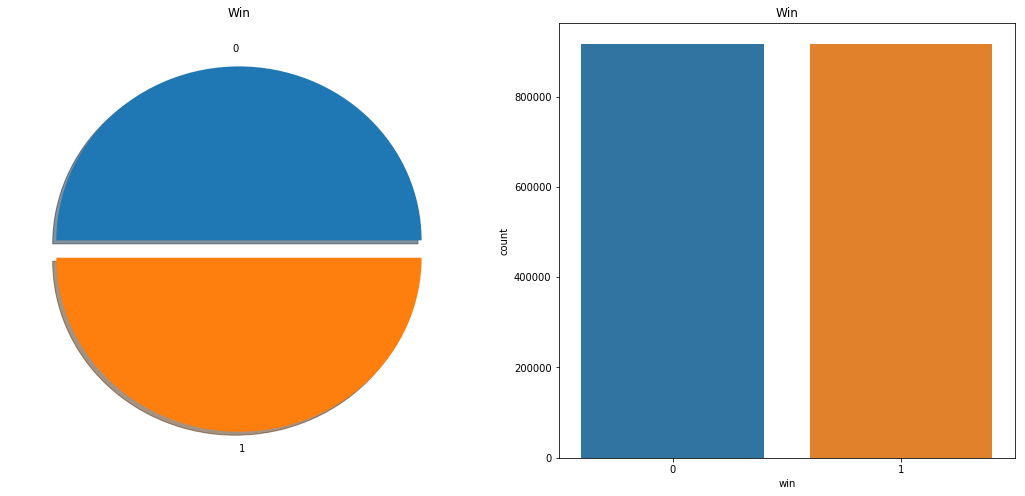

In [11]:
#Visualizing data
f,ax=plt.subplots(1,2,figsize=(18,8))
stats['win'].value_counts().plot.pie(explode=[0,0.1],ax=ax[0],shadow=True)
ax[0].set_title('Win')
ax[0].set_ylabel('')
sns.countplot('win',data=stats,ax=ax[1])
ax[1].set_title('Win')
plt.show()

In [16]:
stats[['win','firstblood']].groupby(['win']).mean()

,firstblood
win,
0,0.080379
1,0.118129


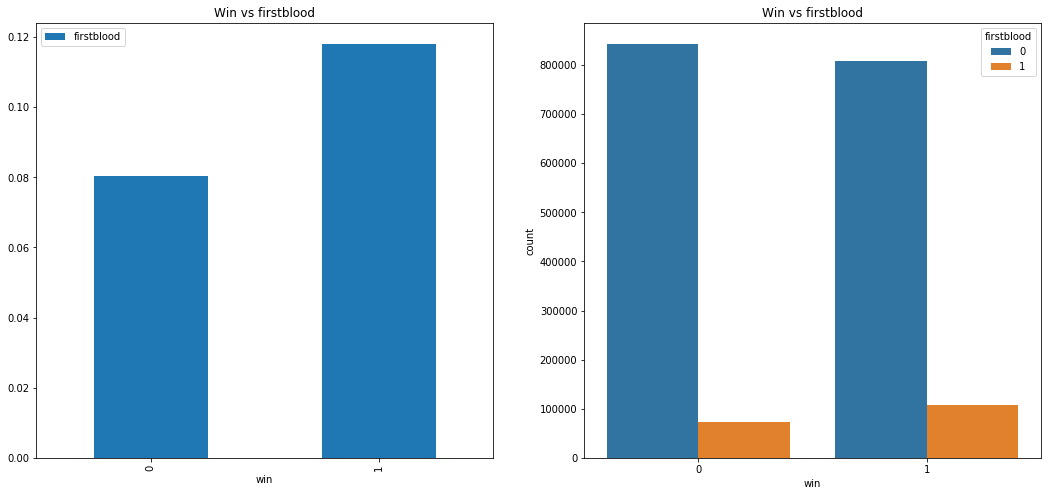

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
stats[['win','firstblood']].groupby(['win']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Win vs firstblood')
ax[0].set_ylabel('')
sns.countplot('win',hue='firstblood',data=stats,ax=ax[1])
ax[1].set_title('Win vs firstblood')
plt.show()

In [17]:
df = pd.merge(participants,stats, how ='right', on = ['id'])

In [18]:
df = pd.merge(df,champs, how ='left', left_on ='championid',right_on='id')


In [19]:
df = pd.merge(df,matches, how ='left' ,left_on ='matchid', right_on = 'id')

In [27]:
def final_position(row):
    if row['role'] in ('DUO_SUPPORT', 'DUO_CARRY'):
        return row['role'][4:]
    else:
        return row['position']
df['adjposition'] = df.apply(final_position, axis = 1) 
df['team'] = df['player'].apply(lambda x: '1' if x <= 5 else '2')
df['team_role'] = df['team'] + '-' + df['adjposition']
remove_index = []
for i in ('1-MID', '1-TOP', '1-SUPPORT', '1-CARRY', '1-JUNGLE', '2-MID', '2-TOP', '2-SUPPORT', '2-CARRY', '2-JUNGLE'):
    df_remove = df[df['team_role'] == i].groupby('matchid').agg({'team_role':'count'})
    remove_index.extend(df_remove[df_remove['team_role']!=1].index.values)   
remove_index.extend(df[df['adjposition'] == 'BOT']['matchid'].unique())
remove_index = list(set(remove_index))
df = df[-df['matchid'].isin(remove_index)]

In [28]:
df[['team','win']].groupby(['team'],as_index = False).mean()

,team,win
0,1,0.513045
1,2,0.486954


In [29]:
df[['team_role','win']].groupby(['team_role']).mean()

,win
team_role,
1-CARRY,0.513045
1-JUNGLE,0.513045
1-MID,0.513045
1-SUPPORT,0.513049
1-TOP,0.513042
2-CARRY,0.486955
2-JUNGLE,0.486951
2-MID,0.486958
2-SUPPORT,0.486955


In [30]:
df[['team','seasonid','win']].groupby(['seasonid','team'],as_index=True).mean()

win
seasonid team          
3        1     0.498018
         2     0.501982
4        1     0.460870
         2     0.539130
5        1     0.515060
         2     0.484940
6        1     0.517157
         2     0.482843
7        1     0.487307
         2     0.512693
8        1     0.513871
         2     0.486128

In [34]:
df[['win','champlvl']].groupby(['win']).mean()

,champlvl
win,
0,14.032338
1,15.165671


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486359 entries, 0 to 1834516
Data columns (total 39 columns):
id_x                1486359 non-null int64
matchid             1486359 non-null int64
player              1486359 non-null int64
championid          1486359 non-null int64
ss1                 1486359 non-null int64
ss2                 1486359 non-null int64
role                1486359 non-null object
position            1486359 non-null object
win                 1486359 non-null int64
kills               1486359 non-null int64
deaths              1486359 non-null int64
assists             1486359 non-null int64
totdmgtochamp       1486359 non-null int64
magicdmgtochamp     1486359 non-null int64
physdmgtochamp      1486359 non-null int64
totheal             1486359 non-null int64
dmgselfmit          1486359 non-null int64
totcctimedealt      1486359 non-null int64
totdmgtaken         1486359 non-null int64
goldearned          1486359 non-null int64
turretkills         14863

In [1]:
df_b = df[df['seasonid']==8]
df_b = df_b[['name', 'win']].groupby(['name'], as_index=False).mean()

NameError: name 'df' is not defined

In [53]:
df_b = df_b.sort_values('win',ascending=True)
df_b[-5:]

,name,win
99,Sona,0.534139
1,Ahri,0.535714
127,Xerath,0.535901
5,Anivia,0.538688
40,Ivern,0.558943


In [55]:
df[['wardsplaced','win']].groupby(['win']).mean()

,wardsplaced
win,
0,11.774195
1,12.243995


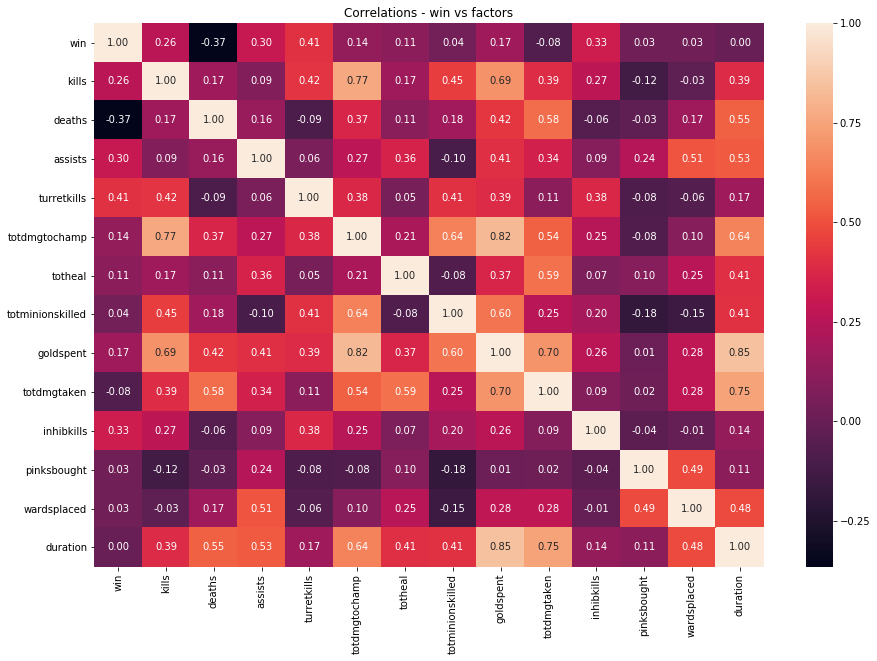

In [10]:

df_corr = df._get_numeric_data()
df_corr = df_corr.drop(['id', 'matchid', 'player', 'seasonid'], axis = 1)
plt.figure(figsize = (15,10))
sns.heatmap(df_corr.corr(), annot = True, fmt = '.2f')
plt.title('Correlations - win vs factors')

In [ ]:
#Visualizing data
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [11]:
df_win_rate = df.groupby('name').agg({'win':np.sum, 'name':'count','kills':np.mean,'deaths':np.mean,'assists':np.mean})
#df_win_rate = df_win_rate.set_index('name')
#df_win_rate = df_win_rate.reset_index()
df_win_rate.columns = ['win matches', 'total matches', 'K', 'D', 'A']
df_win_rate = df_win_rate.reset_index()
df_win_rate['win rate'] = df_win_rate['win matches'] /  df_win_rate['total matches'] * 100
df_win_rate['KDA'] = (df_win_rate['K'] + df_win_rate['A']) / df_win_rate['D']
#df_win_rate = df_win_rate[['total matches', 'win rate', 'K', 'D', 'A', 'KDA']]
df_win_rate.head()

,name,win matches,total matches,K,D,A,win rate,KDA
0,Aatrox,2092,4098,6.366276,6.095412,5.929722,51.049292,2.017254
1,Ahri,19949,37423,7.077439,5.432194,7.510515,53.306790,2.685463
2,Akali,5176,10563,8.848812,6.930133,5.368551,49.001231,2.051528
3,Alistar,4494,9127,1.913991,5.515284,13.073628,49.238523,2.717470
4,Amumu,7118,13584,4.587161,5.299691,10.650177,52.399882,2.875137


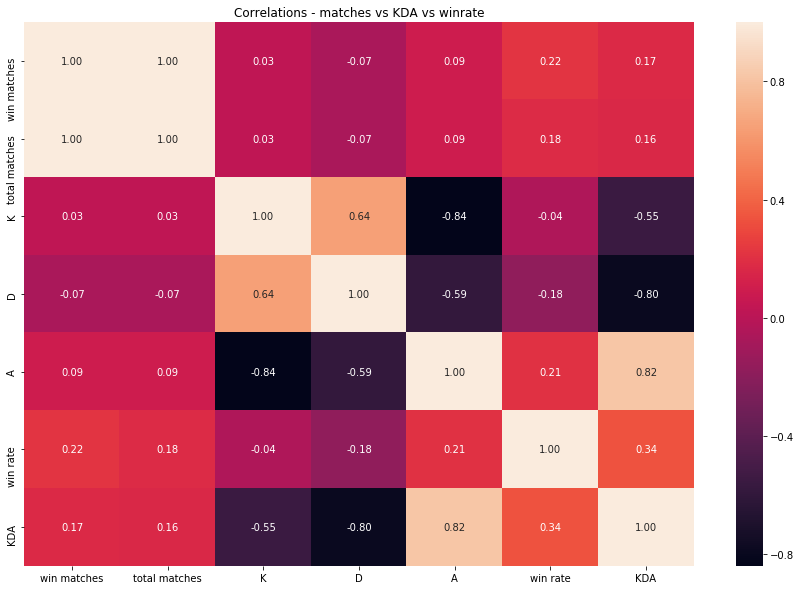

In [12]:
plt.figure(figsize = (15,10))
sns.heatmap(df_win_rate.corr(), annot = True, fmt = '.2f')
plt.title('Correlations - matches vs KDA vs winrate')

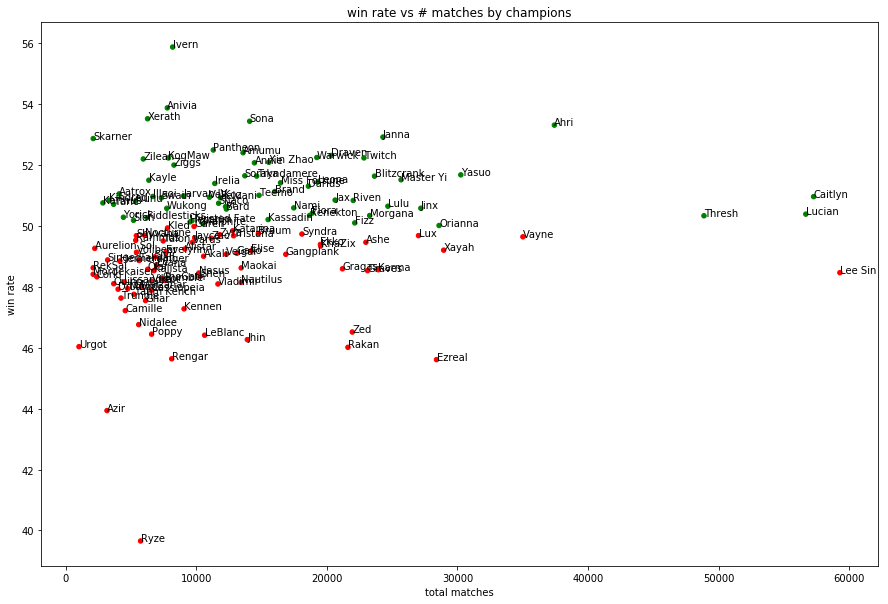

In [15]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

df_win_rate['color map'] = df_win_rate['win rate'].apply(lambda x: 'green' if x > 50 else 'red')

ax = df_win_rate.plot(kind = 'scatter', x = 'total matches', y = 'win rate', color = df_win_rate['color map'].tolist(), figsize = (15,10), title = 'win rate vs # matches by champions')

label_point(df_win_rate['total matches'], df_win_rate['win rate'], df_win_rate['name'], ax)